# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [ ]:
#read the data
df = pd.read_csv("CC GENERAL.csv")

print('The shape of the dataset is:', df.shape)
df

The shape of the dataset is: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [ ]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [ ]:
# feel free to investigate what you want
df = df.drop('CUST_ID',axis = 1)

In [ ]:
df = df.dropna()

In [ ]:
df = df.reset_index(drop=True)

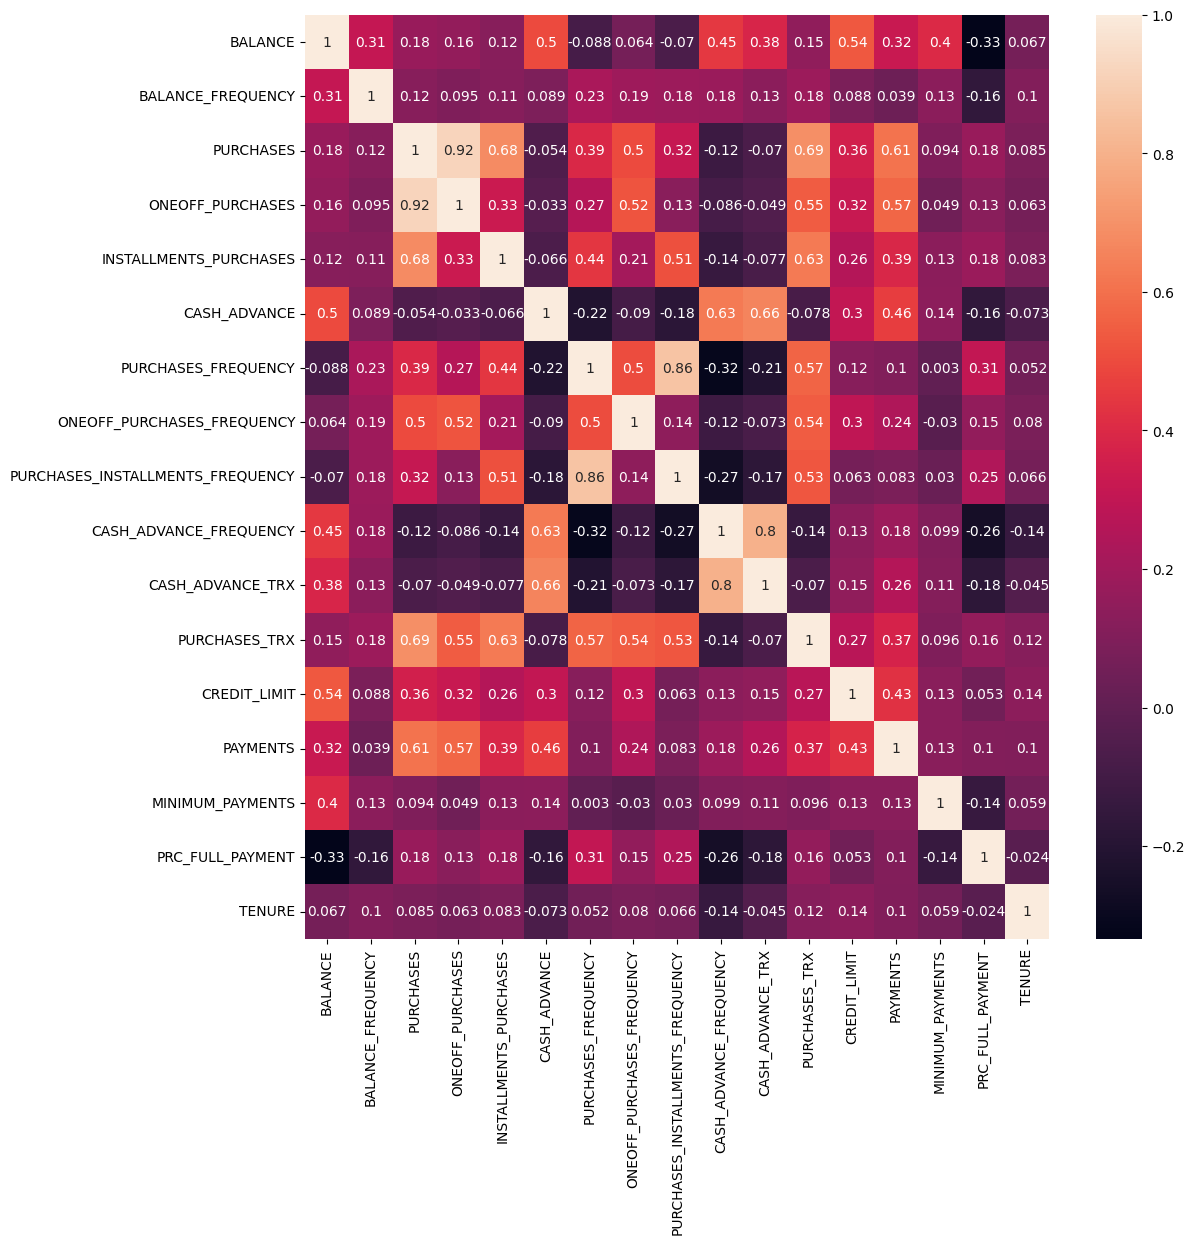

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

In [ ]:
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df_copy = np.log(df_copy + 1)
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
4,7.501540,0.693147,7.196147,0.000000,7.196147,0.000000,0.510826,0.000000,0.459532,0.000000,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,1.927413,0.405465,3.086487,3.086487,0.000000,0.000000,0.154151,0.154151,0.000000,0.000000,0.000000,0.693147,6.216606,4.088408,3.794898,0.000000,1.945910
8632,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910
8633,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910
8634,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,1.945910


## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you
5- Using different techniques for scaling and comment on the result

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df_copy)
print(pca.explained_variance_ratio_)

[0.50318518 0.23932324 0.14532872 0.05082118 0.01925747]


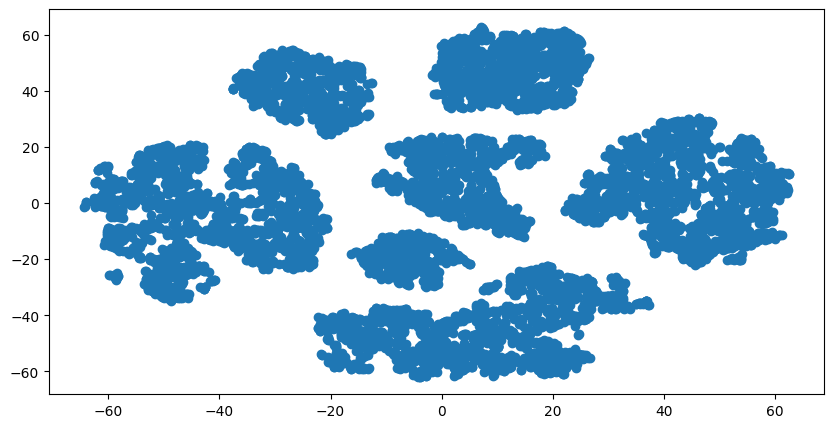

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30,learning_rate = 1000, init='pca',n_iter=500)
embeding = tsne.fit_transform(df_copy)
plt.figure(figsize=(10, 5))
plt.scatter(embeding[:,0],embeding[:,1])

In [ ]:
from sklearn.cluster import KMeans
kmeans_models = KMeans(n_clusters=7, random_state=23)
label = kmeans_models.fit_predict(df_copy)
label.shape

(8636,)

<Axes: xlabel='feature_1', ylabel='feature_2'>

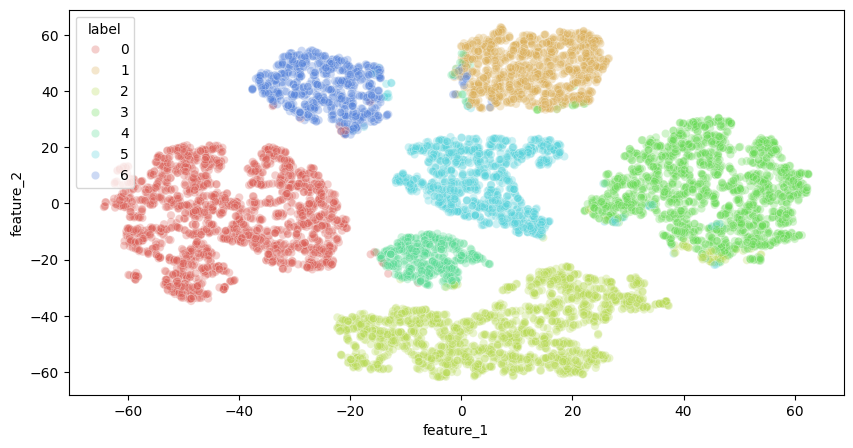

In [ ]:
tsne_df = pd.DataFrame(embeding, columns=['feature_1', 'feature_2'])
tsne_df['label'] = label
plt.figure(figsize=(10,5))
sns.scatterplot(
    x="feature_1", y="feature_2",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

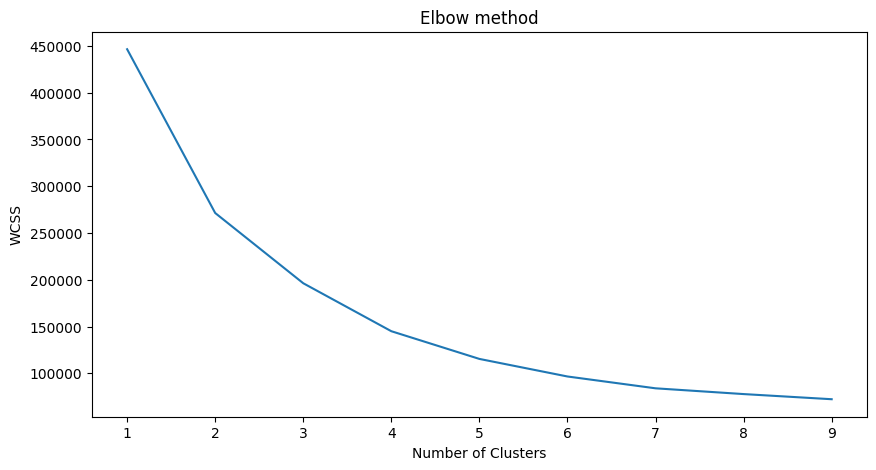

In [ ]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df_copy) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

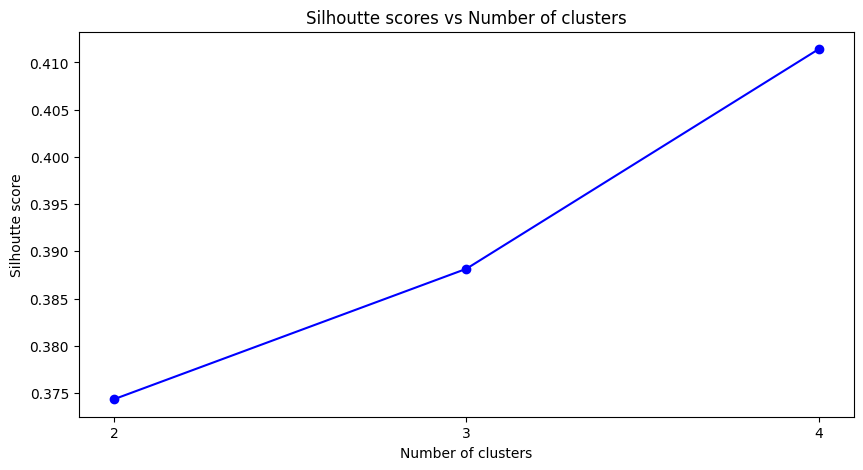

In [ ]:
from sklearn.metrics import silhouette_score
silhoutte_scores = [silhouette_score(df_copy, model.labels_) for model in kmeans_models[1:4]]
plt.figure(figsize=(10, 5))
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(df_copy)

print('Silhoutte score of our model is ' + str(silhouette_score(df_copy, kmeans.labels_)))

Silhoutte score of our model is 0.37433635375677327


<Figure size 640x480 with 0 Axes>

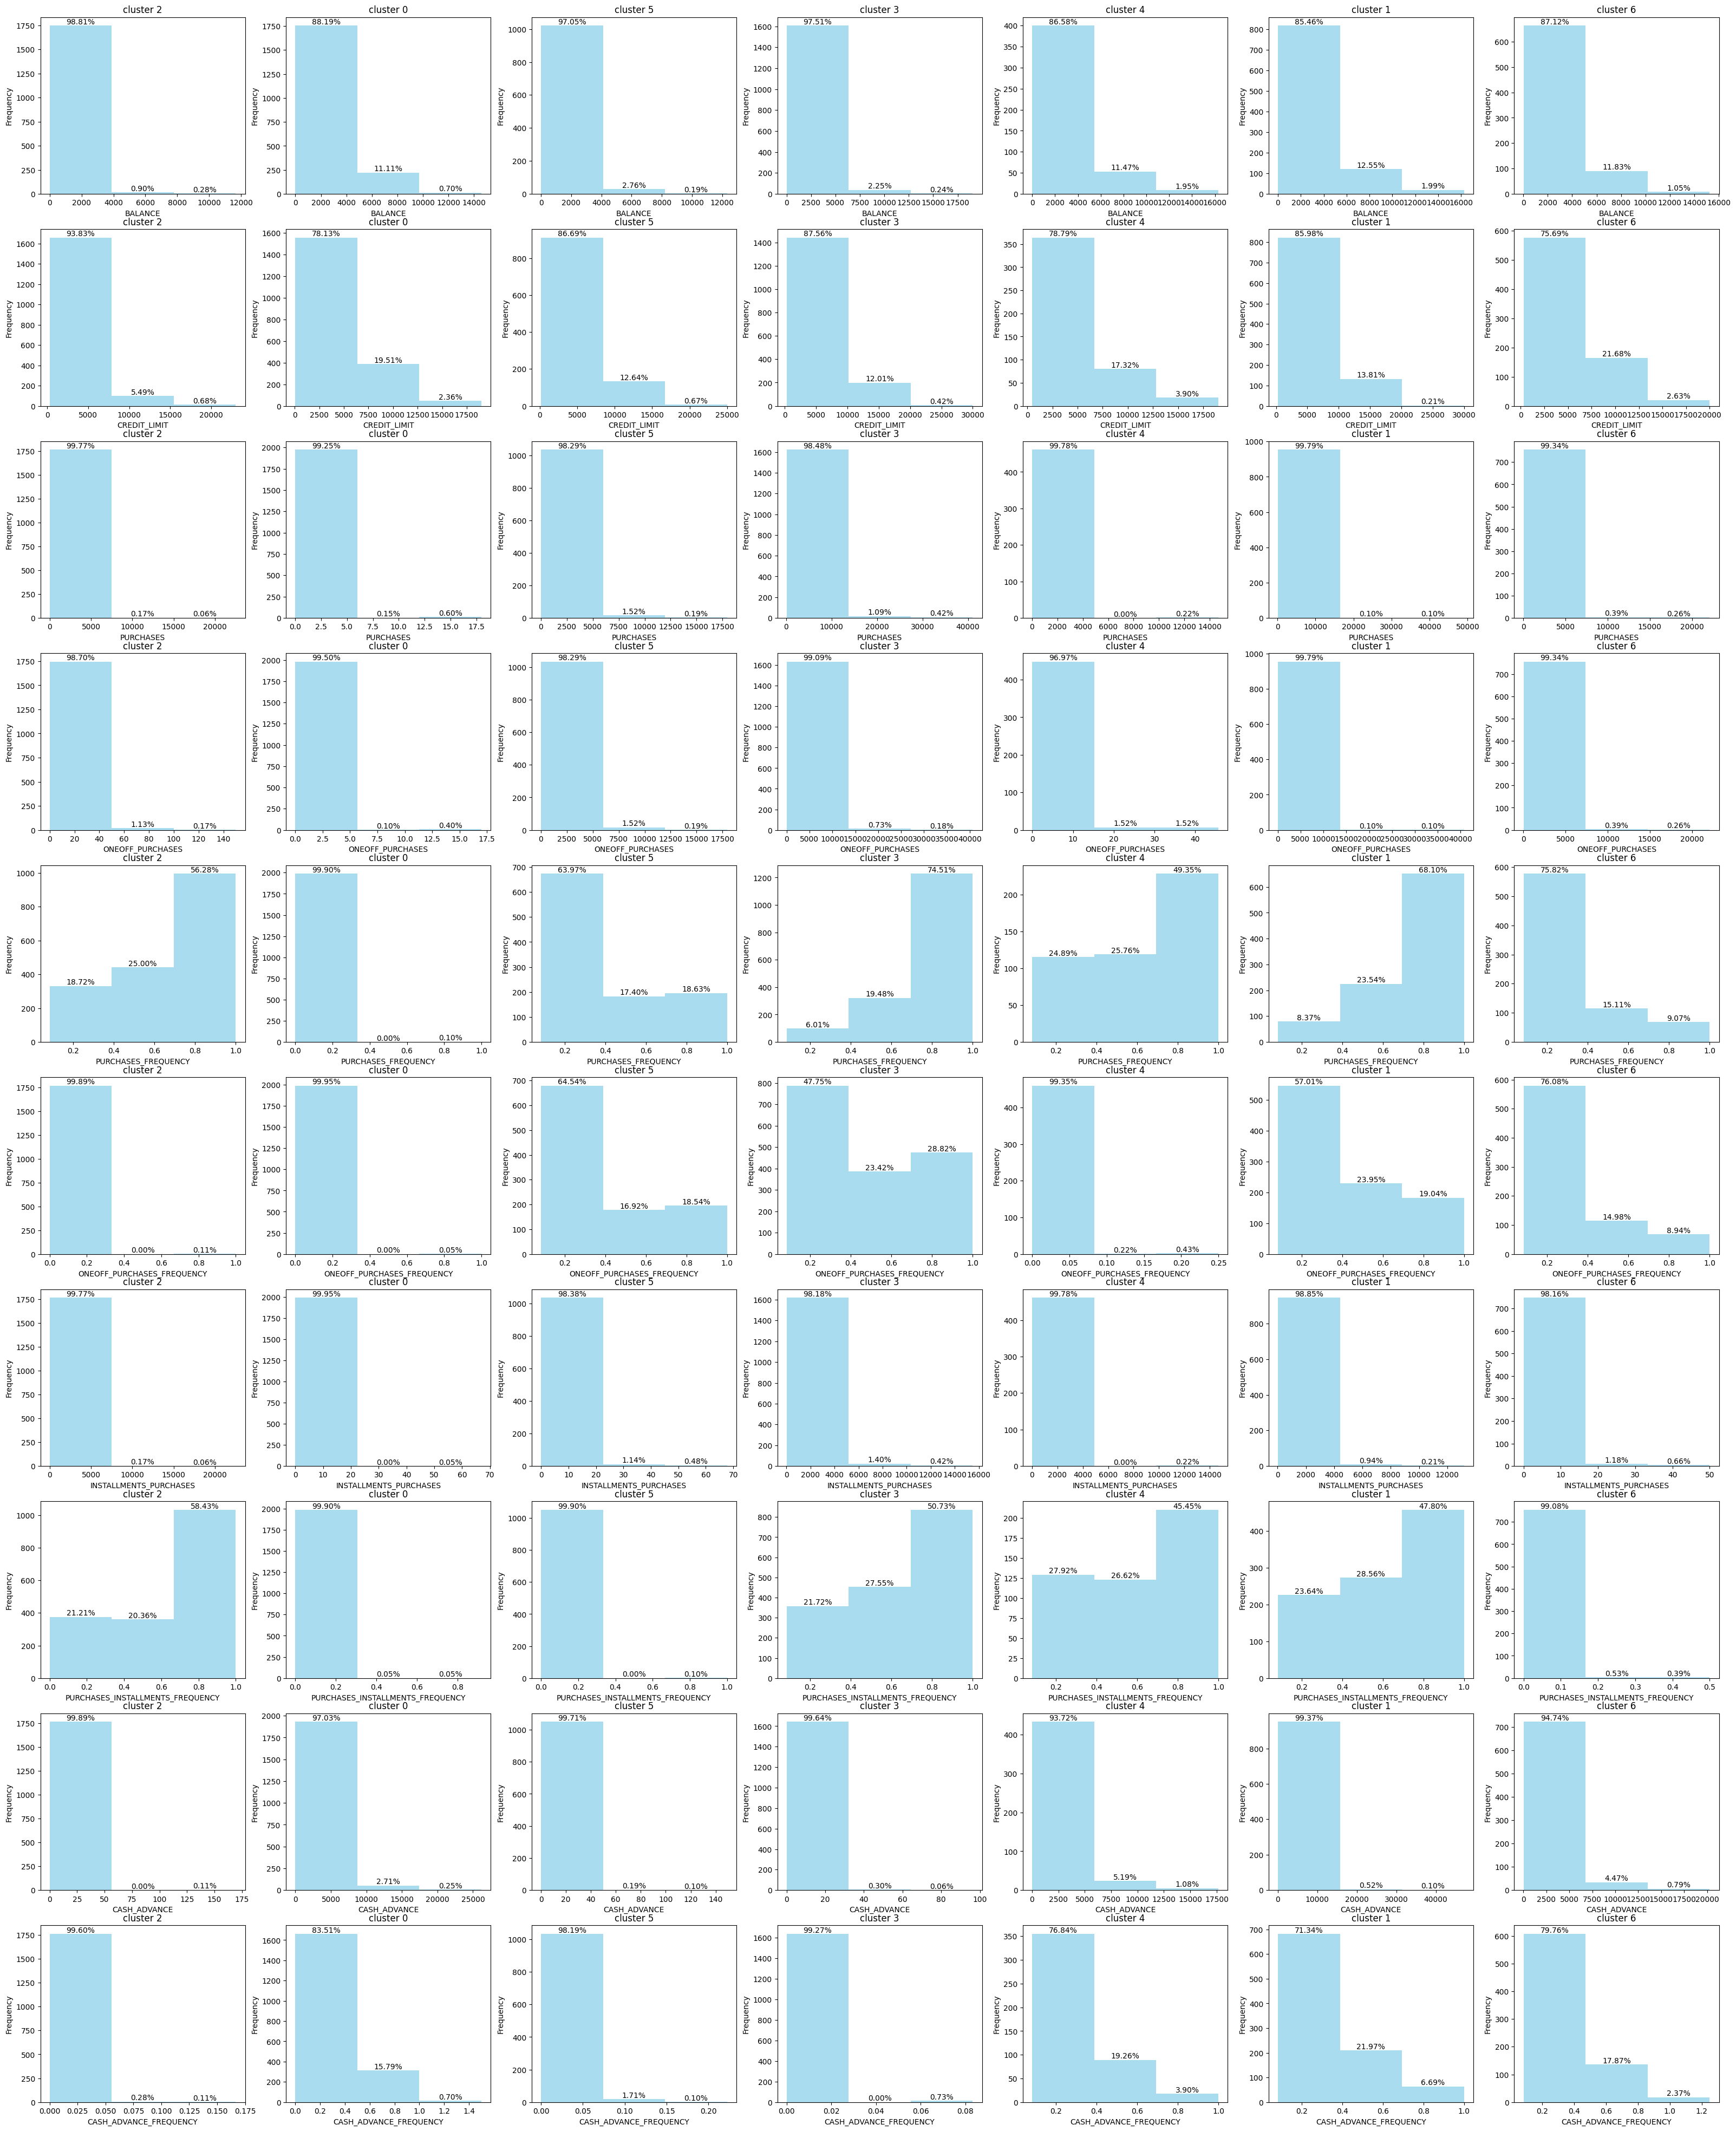

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df['Cluster']=label
num_clusters = len(df['Cluster'].unique())

plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
important_columns=['BALANCE','CREDIT_LIMIT', 'PURCHASES', 'ONEOFF_PURCHASES','PURCHASES_FREQUENCY',
        'ONEOFF_PURCHASES_FREQUENCY','INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE',
       'CASH_ADVANCE_FREQUENCY',
       ]
fig, axs = plt.subplots(len(important_columns), num_clusters, figsize=(40, 5*len(important_columns)))

for i, feature in enumerate(important_columns):
    for j, cluster in enumerate(df['Cluster'].unique()):
        cluster_data = df[df['Cluster'] == cluster][feature]
        axs[i, j].hist(cluster_data, bins=3, color='skyblue', alpha=0.7)
        axs[i, j].set_title(f'cluster {cluster}')
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('Frequency')
        total_records = len(cluster_data)
        for bin_value in axs[i, j].patches:
            bin_x = bin_value.get_x() + bin_value.get_width() / 2
            bin_y = bin_value.get_height()
            percentage = 100 * bin_y / total_records
            axs[i, j].annotate(f'{percentage:.2f}%', (bin_x, bin_y), ha='center', va='bottom')

plt.show()

1. **Claster 0** : Maximum purchase amount in single transaction for all most people 5 and all most pepole have medium cash advance and all most pepole in this cluster their PURCHASES_FREQUENCY between 0 and .3 and  all most all people no Repeat purchase installments

2. **Claster 1** : Maximum purchase amount in single transaction for all most people 15000 and all most pepole have high cash advance and 68% from pepole in this cluster their PURCHASES_FREQUENCY between .7 and 1 and 49% from people Repeat purchase installments

3. **Claster 2** : Maximum purchase amount in single transaction for all most people 40 and all most pepole have low cash advance and 57% from pepole in this cluster their PURCHASES_FREQUENCY between .7 and 1 and 59% from people Repeat purchase installments

4. **Claster 3** : Maximum purchase amount in single transaction for all most people 15000 and all most pepole have low cash advance and 75% from pepole in this cluster their PURCHASES_FREQUENCY between .7 and 1 and 51% from people Repeat purchase installments

5. **Claster 4** : Maximum purchase amount in single transaction for all most people 15 and all most pepole have medium cash advance and 50% from pepole in this cluster their PURCHASES_FREQUENCY between .7 and 1 and 46% from people Repeat purchase installments

6. **Claster 5** : Maximum purchase amount in single transaction for all most people 6000 and all most pepole have low cash advance and 64% from pepole in this cluster their PURCHASES_FREQUENCY between 0 and .4 and all most people no Repeat purchase installments

7. **Claster 6** : Maximum purchase amount in single transaction for all most people 7000 and all most pepole have medium cash advance and 76% from pepole in this cluster their PURCHASES_FREQUENCY between 0 and .4 and all most people no Repeat purchase installments





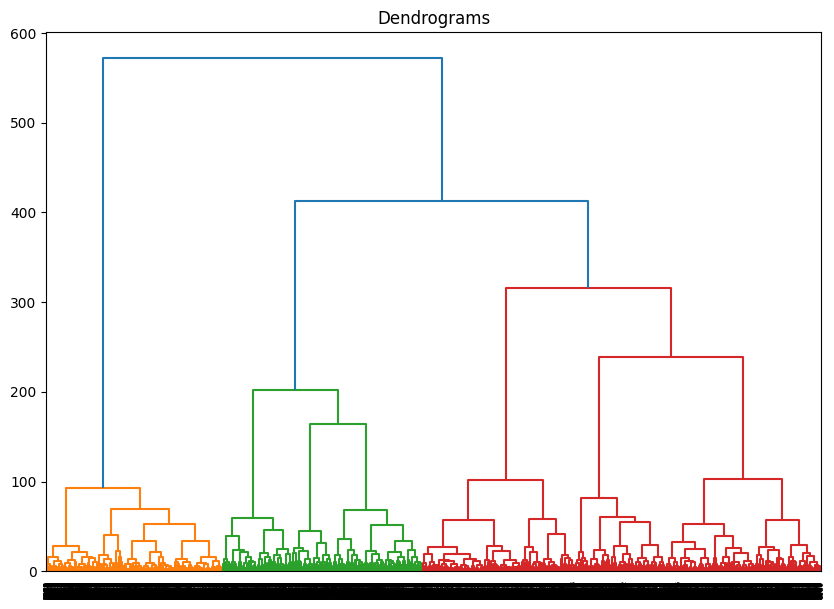

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_copy, method='ward'))

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method

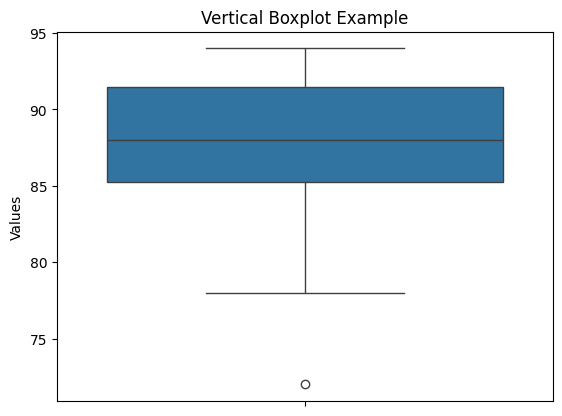

In [ ]:
import seaborn as sns

# Sample data
data = [85, 92, 88, 72, 90, 78, 81, 88, 86, 92, 94, 87, 90, 92]

# Create a vertical boxplot using Seaborn
sns.boxplot(y=data, orient="v")

# Add title and labels
plt.title('Vertical Boxplot Example')
plt.ylabel('Values')

# Show the plot
plt.show()
